# **WET RACE ANALYSIS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("f1_ground_effect_results.csv")

# Remove Pre-Season
df_clean = df[~df['Race'].str.contains("Pre-Season", case=False)]

In [ ]:
# Drop duplicates to count unique races
df_unique_races = df_clean.drop_duplicates(subset=["Year", "Race"])

# Count wet and dry races
wet_dry_counts = df_unique_races["IsWetRace"].value_counts()

print("Total number of dry races =", wet_dry_counts.get(False, 0))
print("Total number of wet races =", wet_dry_counts.get(True, 0))


Total number of dry races = 57
Total number of wet races = 11


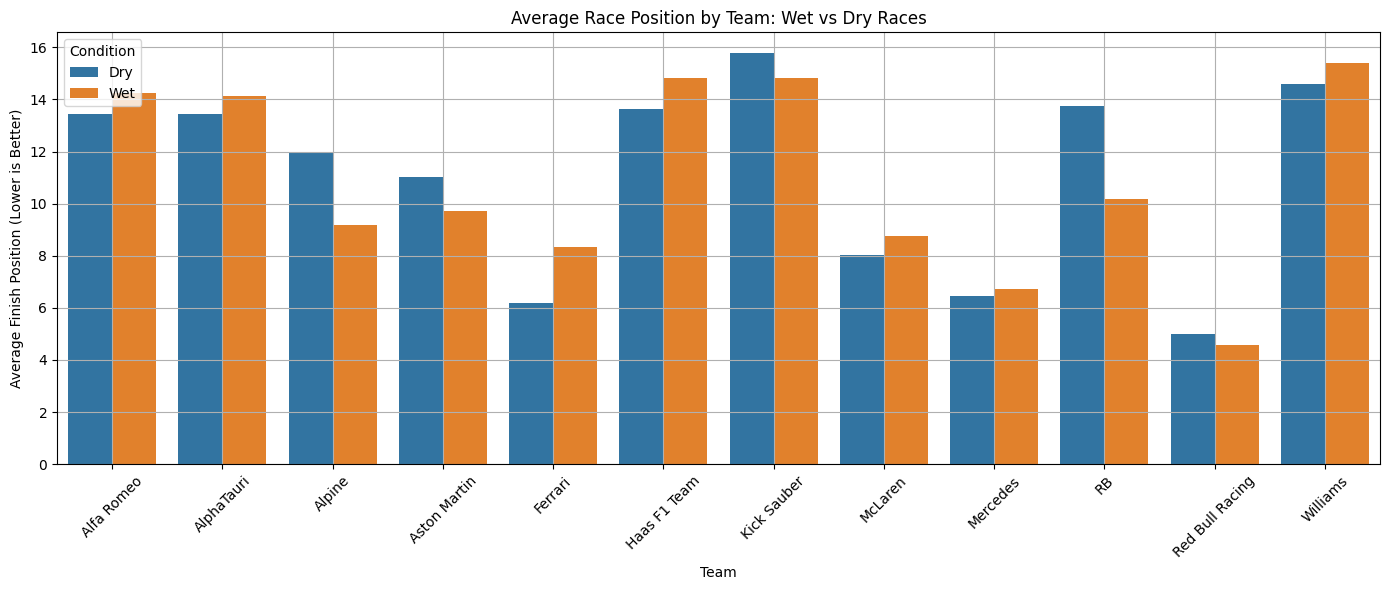

In [ ]:

# Grouping by wet race
team_perf = df_clean.groupby(['Team', 'IsWetRace'])['RacePosition'].mean().reset_index()
team_perf['Condition'] = team_perf['IsWetRace'].map({True: 'Wet', False: 'Dry'})

plt.figure(figsize=(14, 6))
sns.barplot(data=team_perf, x='Team', y='RacePosition', hue='Condition')
plt.title("Average Race Position by Team: Wet vs Dry Races")
plt.ylabel("Average Finish Position (Lower is Better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

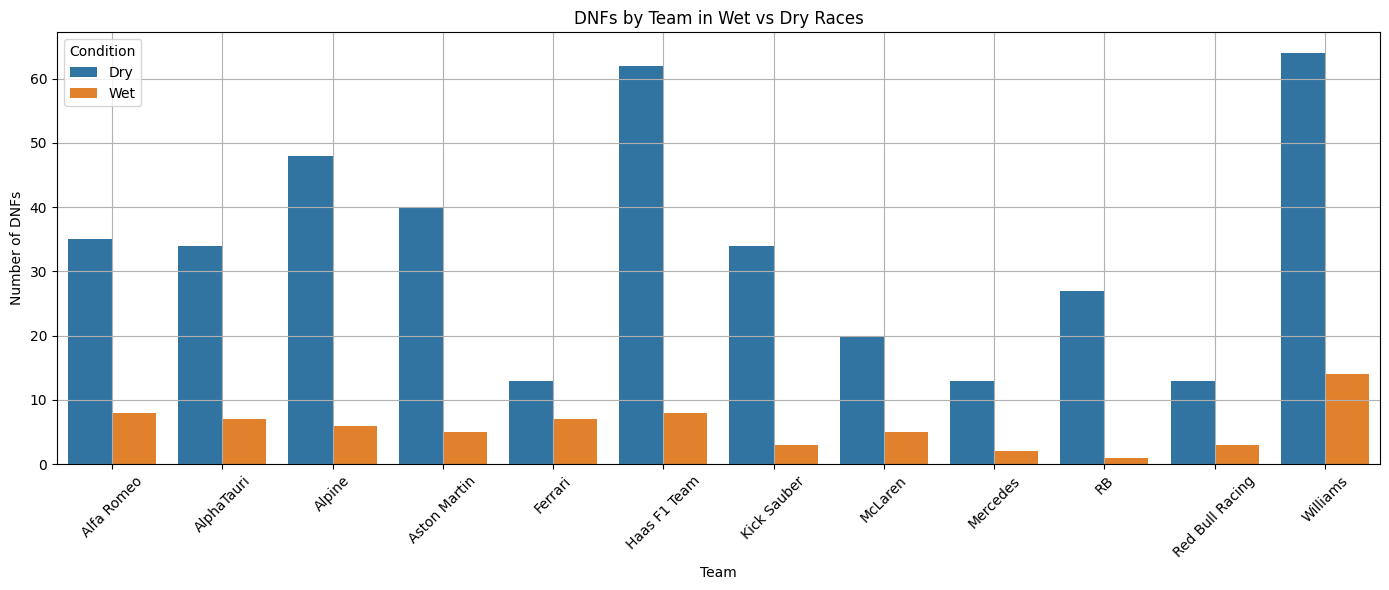

In [ ]:
# Checking DNFs(Did not finish)
df_dnf = df_clean[df_clean['Status'] != "Finished"]
team_dnf = df_dnf.groupby(['Team', 'IsWetRace']).size().reset_index(name='DNF_Count')
team_dnf['Condition'] = team_dnf['IsWetRace'].map({True: 'Wet', False: 'Dry'})

plt.figure(figsize=(14, 6))
sns.barplot(data=team_dnf, x='Team', y='DNF_Count', hue='Condition')
plt.title("DNFs by Team in Wet vs Dry Races")
plt.ylabel("Number of DNFs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

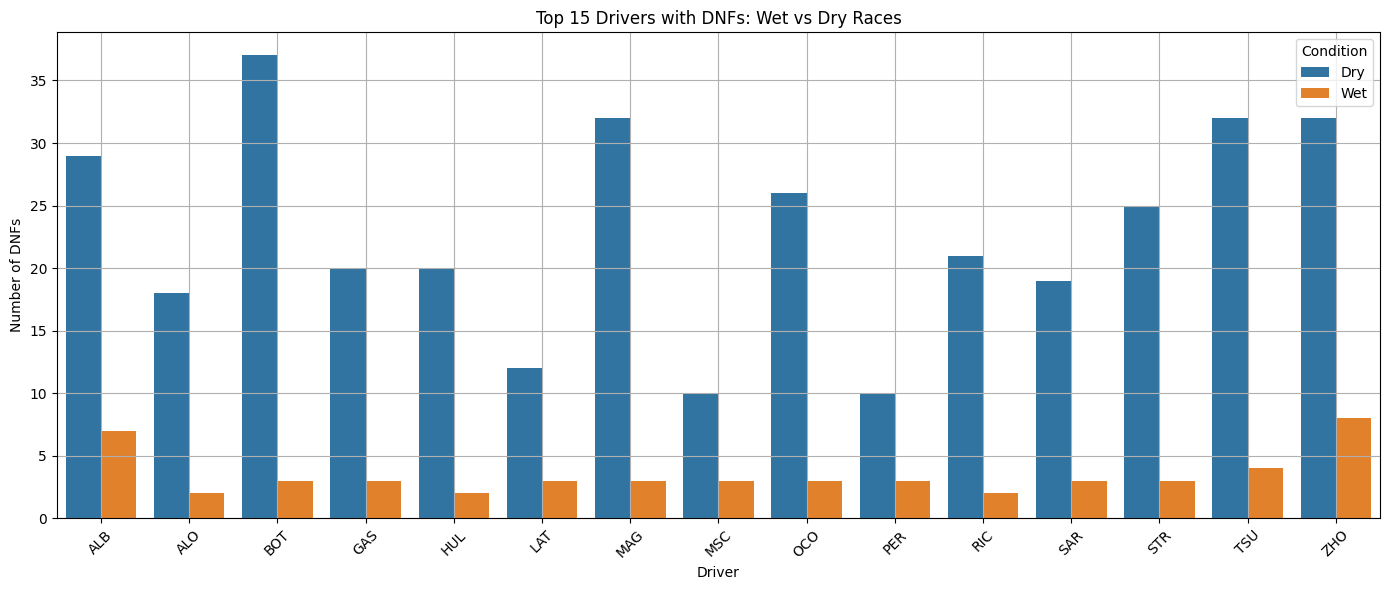

In [ ]:
driver_dnf = df_dnf.groupby(['Driver', 'IsWetRace']).size().reset_index(name='DNF_Count')
driver_dnf['Condition'] = driver_dnf['IsWetRace'].map({True: 'Wet', False: 'Dry'})

# Top 15 drivers with most DNFs
top_drivers = driver_dnf.groupby('Driver')['DNF_Count'].sum().nlargest(15).index
driver_dnf_top = driver_dnf[driver_dnf['Driver'].isin(top_drivers)]

plt.figure(figsize=(14, 6))
sns.barplot(data=driver_dnf_top, x='Driver', y='DNF_Count', hue='Condition')
plt.title("Top 15 Drivers with DNFs: Wet vs Dry Races")
plt.ylabel("Number of DNFs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

/tmp/ipython-input-19-463582927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_wet_drivers, x='Driver', y='Score', palette='Blues_d')


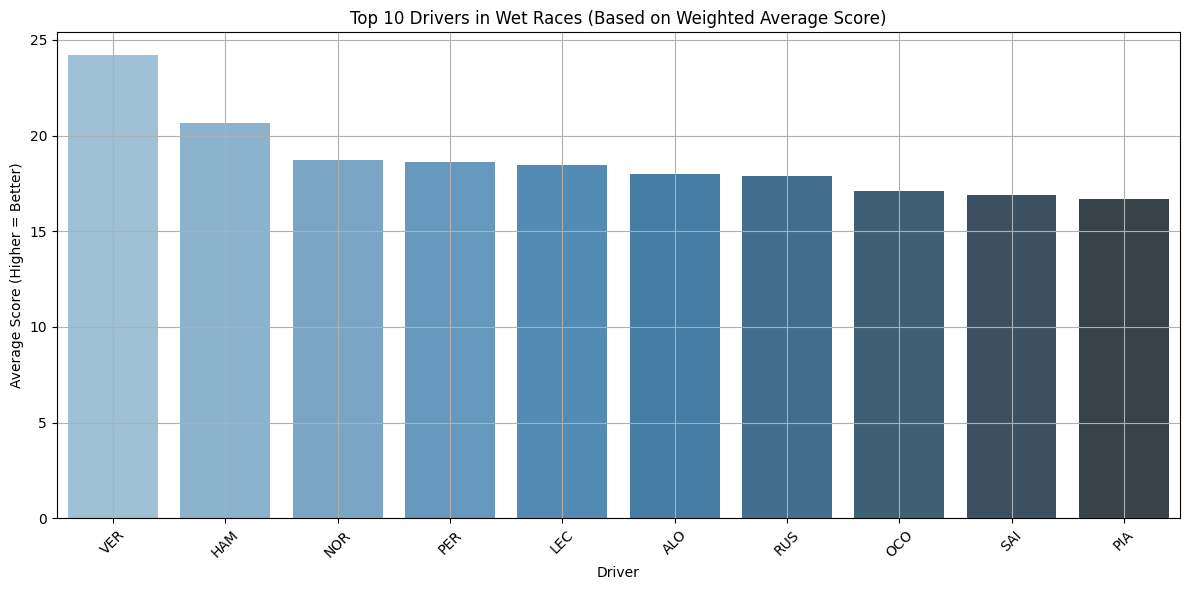

🏆 Top 3 Drivers in Wet Races (2022–2024):
   Driver      Score
24    VER  24.181818
7     HAM  20.636364
14    NOR  18.727273


In [ ]:
# Filtering for wet races
wet_races = df_clean[(df_clean['IsWetRace']) & (~df_clean['RacePosition'].isna())].copy()

# Scores assigned: 26 - Position
wet_races['Score'] = wet_races['RacePosition'].apply(lambda x: 26 - x if x > 0 else 0)

# Group and rank
wet_scores = wet_races.groupby('Driver')['Score'].mean().reset_index().sort_values(by='Score', ascending=False)
top_10_wet_drivers = wet_scores.head(10)

# Plot top 10 drivers in the wet
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_wet_drivers, x='Driver', y='Score', palette='Blues_d')
plt.title("Top 10 Drivers in Wet Races (Based on Weighted Average Score)")
plt.ylabel("Average Score (Higher = Better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Top 3 Drivers in the wet
print("🏆 Top 3 Drivers in Wet Races (2022–2024):")
print(top_10_wet_drivers.head(3))